<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [2]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-15 20:09:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  61.4MB/s    in 3.3s    

2025-11-15 20:09:20 (61.2 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [3]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 148.3 MB/s eta 0:00:00


In [4]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 102.3 MB/s eta 0:00:00


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [6]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


count    3.336500e+04
mean     2.790782e+07
std      8.412558e+08
min      1.095000e+03
25%      6.000000e+04
50%      1.100000e+05
75%      2.500000e+05
max      1.000000e+11
Name: CompTotal, dtype: float64


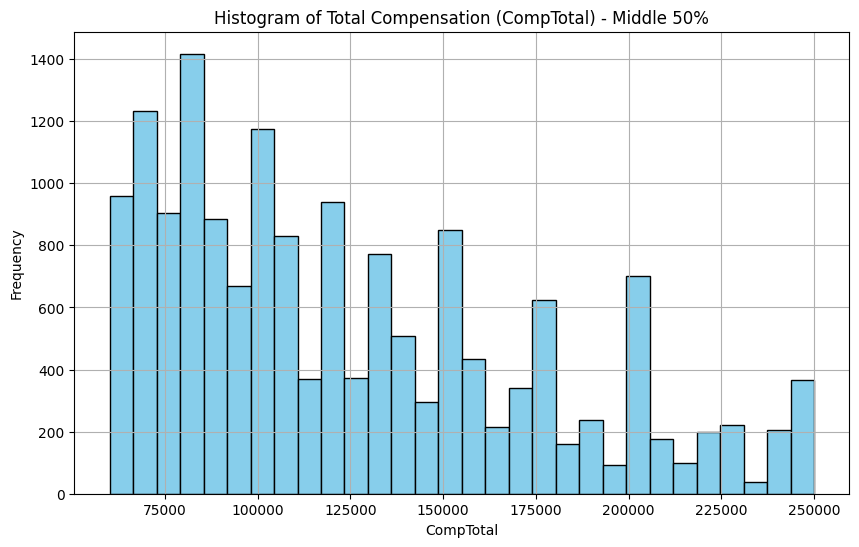

In [10]:
QUERY = """
SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df[df['CompTotal'] < 1e+12]
df = df[df['CompTotal'] > 0]
df = df[df['CompTotal'] > 1000]  

print(df['CompTotal'].describe())

df_middle = df[(df['CompTotal'] > df['CompTotal'].quantile(0.25)) & (df['CompTotal'] <= df['CompTotal'].quantile(0.75))]

plt.figure(figsize=(10, 6))
plt.hist(df_middle['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal) - Middle 50%')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


  YearsCodePro
0           17
1           27
2            7
3           11
4           25


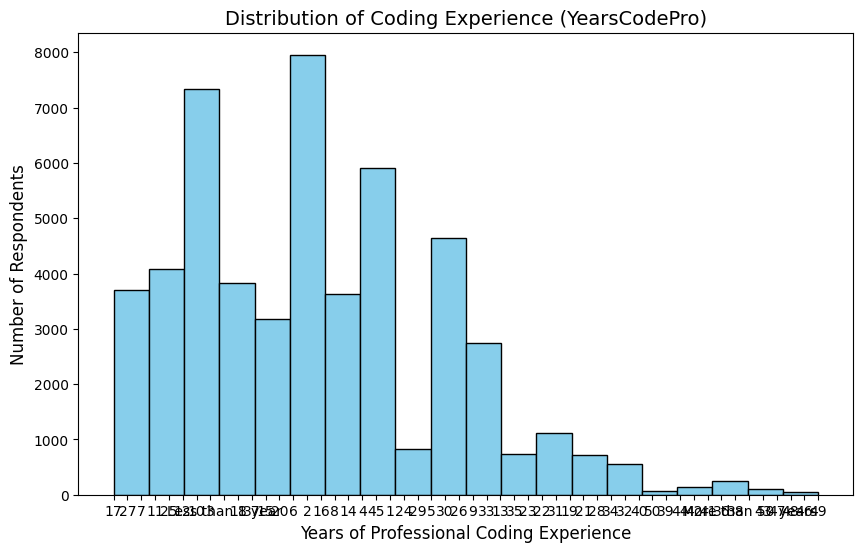

In [11]:
QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL;
"""

# Execute the query and load the data into a DataFrame
df_years_code_pro = pd.read_sql_query(QUERY, conn)

# Display the first few rows of the data to check if it is correct
print(df_years_code_pro.head())

# Check if the data is valid
if not df_years_code_pro.empty:
    # Create the histogram
    plt.figure(figsize=(10, 6))
    
    # Plot the histogram
    plt.hist(df_years_code_pro['YearsCodePro'], bins=20, color='skyblue', edgecolor='black')
    
    # Add title and labels
    plt.title('Distribution of Coding Experience (YearsCodePro)', fontsize=14)
    plt.xlabel('Years of Professional Coding Experience', fontsize=12)
    plt.ylabel('Number of Respondents', fontsize=12)
    
    # Show the plot
    plt.show()
else:
    print("No data to display")


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


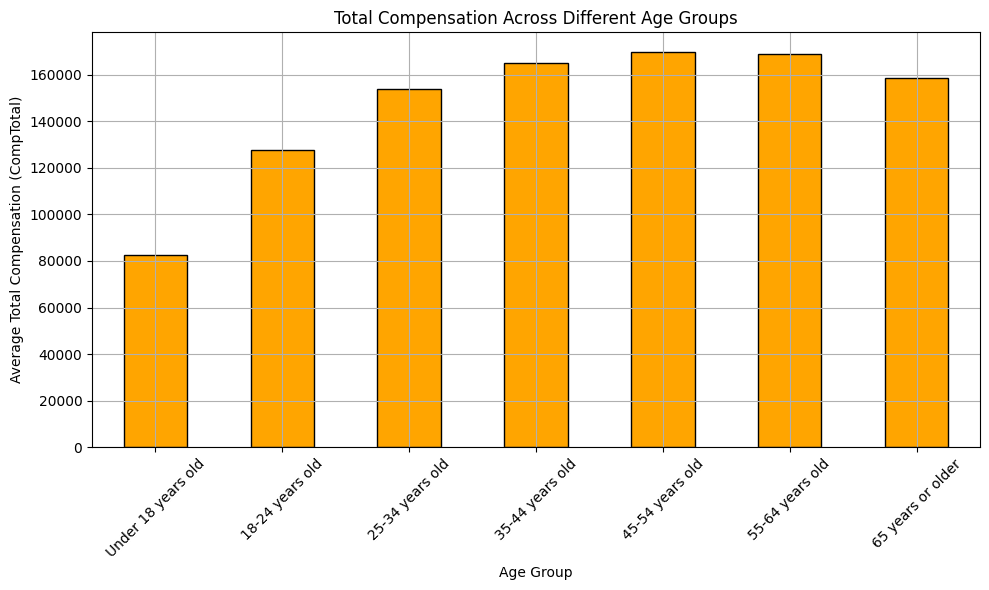

In [12]:
QUERY = "SELECT Age, CompTotal FROM main"

df = pd.read_sql_query(QUERY, conn)

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df.dropna(subset=['CompTotal', 'Age'], inplace=True)

df = df[df['CompTotal'] < 1_000_000]

mapping_age_group = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65
}

df['AgeMapped'] = df['Age'].map(mapping_age_group)

age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

age_group_avg_compensation = df.groupby('AgeMapped')['CompTotal'].mean()

plt.figure(figsize=(10, 6))
age_group_avg_compensation.plot(kind='bar', color='orange', edgecolor='black')

plt.xticks(ticks=range(len(age_groups)), labels=age_groups, rotation=45)
plt.title('Total Compensation Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Total Compensation (CompTotal)')
plt.grid(True)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


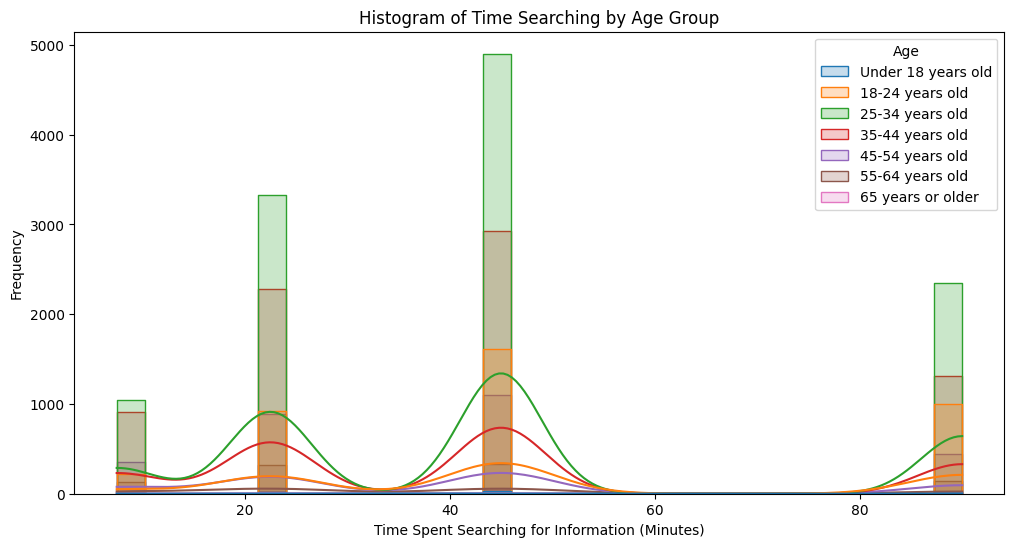

In [16]:
!pip install seaborn
import seaborn as sns

QUERY = "SELECT Age, TimeSearching FROM main"

df = pd.read_sql_query(QUERY, conn)

time_mapping = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "More than 4 hours a day": 270
}

# Apply mapping
df["TimeSearching"] = df["TimeSearching"].map(time_mapping)

# Drop NaNs if any mapping failed
df = df.dropna(subset=["TimeSearching"])

Age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old", 
    "35-44 years old", "45-54 years old", "55-64 years old", 
    "65 years or older"
]

# Ensure Age is categorical
df["Age"] = pd.Categorical(df["Age"], categories=Age_order, ordered=True)

# Convert TimeSearching to numeric & drop NaNs
df["TimeSearching"] = pd.to_numeric(df["TimeSearching"], errors="coerce")
df = df.dropna(subset=["TimeSearching", "Age"])  # Drop missing values
if df["Age"].nunique() > 1:  # Ensure multiple age groups exist
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(data=df, x="TimeSearching", hue="Age", bins=30, kde=True, element="step")

    # Labels and title
    plt.xlabel("Time Spent Searching for Information (Minutes)")
    plt.ylabel("Frequency")
    plt.title("Histogram of Time Searching by Age Group")

    # Ensure legend appears
    handles, labels = ax.get_legend_handles_labels()
    if labels:  # Only add legend if labels exist
        plt.legend(handles, labels, title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Show plot
    plt.show()
else:
    print("No valid Age groups available after filtering.")


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


/tmp/ipykernel_301/2726082829.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_databases.index, y=top_5_databases.values, palette='Blues_d')


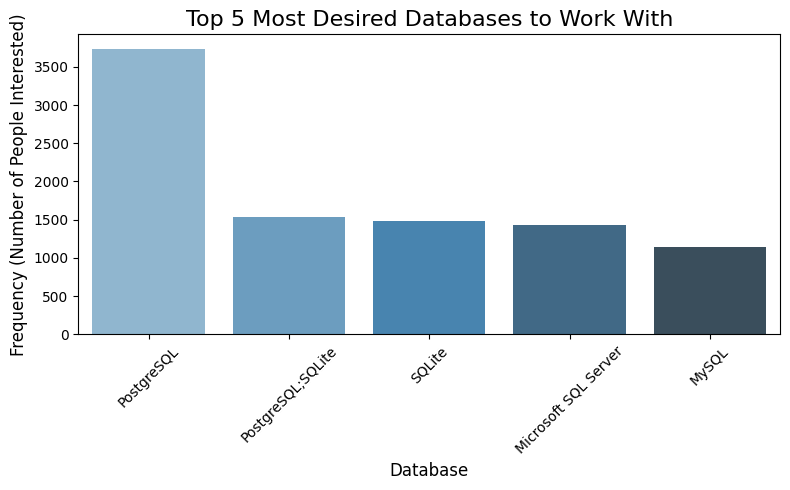

In [17]:
QUERY = "SELECT DatabaseWantToWorkWith FROM main"

df = pd.read_sql_query(QUERY, conn)

df.dropna(subset=['DatabaseWantToWorkWith'], inplace=True)

database_counts = df['DatabaseWantToWorkWith'].value_counts()

top_5_databases = database_counts.head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_databases.index, y=top_5_databases.values, palette='Blues_d')

plt.title('Top 5 Most Desired Databases to Work With', fontsize=16)
plt.xlabel('Database', fontsize=12)
plt.ylabel('Frequency (Number of People Interested)', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (``)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


/tmp/ipykernel_301/3688677326.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=work_arrangement_counts.index, y=work_arrangement_counts.values, palette='viridis')


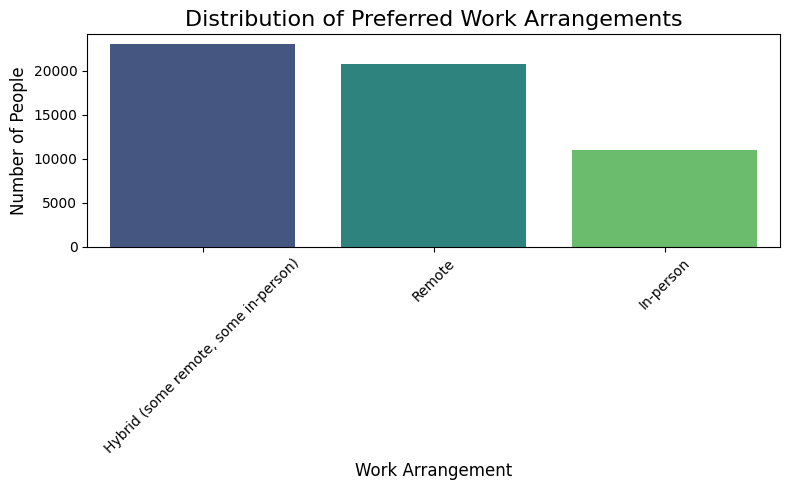

In [19]:
QUERY = "SELECT RemoteWork FROM main"

df = pd.read_sql_query(QUERY, conn)

work_arrangement_counts = df['RemoteWork'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=work_arrangement_counts.index, y=work_arrangement_counts.values, palette='viridis')

plt.title('Distribution of Preferred Work Arrangements', fontsize=16)
plt.xlabel('Work Arrangement', fontsize=12)
plt.ylabel('Number of People', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


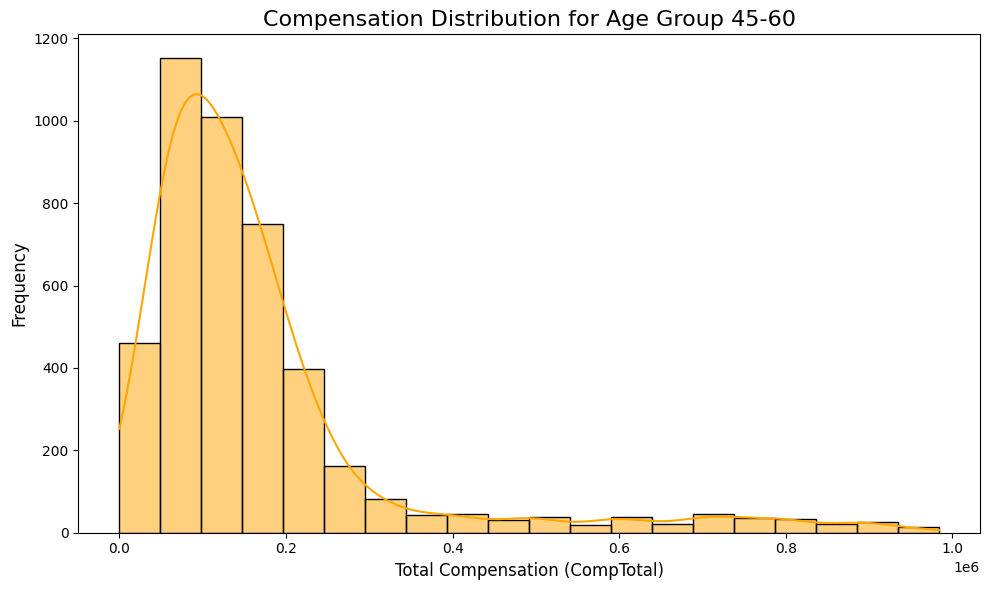

In [21]:
QUERY = "SELECT Age, CompTotal FROM main"

df = pd.read_sql_query(QUERY, conn)

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df.dropna(subset=['CompTotal', 'Age'], inplace=True)
df = df[df['CompTotal'] < 1_000_000]


filtered_df = df[df['Age'].isin(['45-54 years old', '55-64 years old'])]

# Step 2: Plot the histogram for 'CompTotal' within this age group
plt.figure(figsize=(10, 6))

# Use seaborn to plot the distribution of 'CompTotal'
sns.histplot(filtered_df['CompTotal'], bins=20, kde=True, color='orange', edgecolor='black')

# Add titles and labels
plt.title('Compensation Distribution for Age Group 45-60', fontsize=16)
plt.xlabel('Total Compensation (CompTotal)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


Unique values in 'YearsCodePro':
['12' '27' '10' 'Less than 1 year' '18' '15' '17' '6' '7' '16' '14' '4'
 '8' '2' '29' '5' '30' '1' '25' '24' '26' '9' '20' '37' '11' '3' '13' '19'
 '21' '23' '34' '28' '32' '22' '33' '40' '39' '31' '35' '41' '38'
 'More than 50 years' '36' '43' '42' '50' '45' '44' '46' '48' '47' '49']


/tmp/ipykernel_301/684856444.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


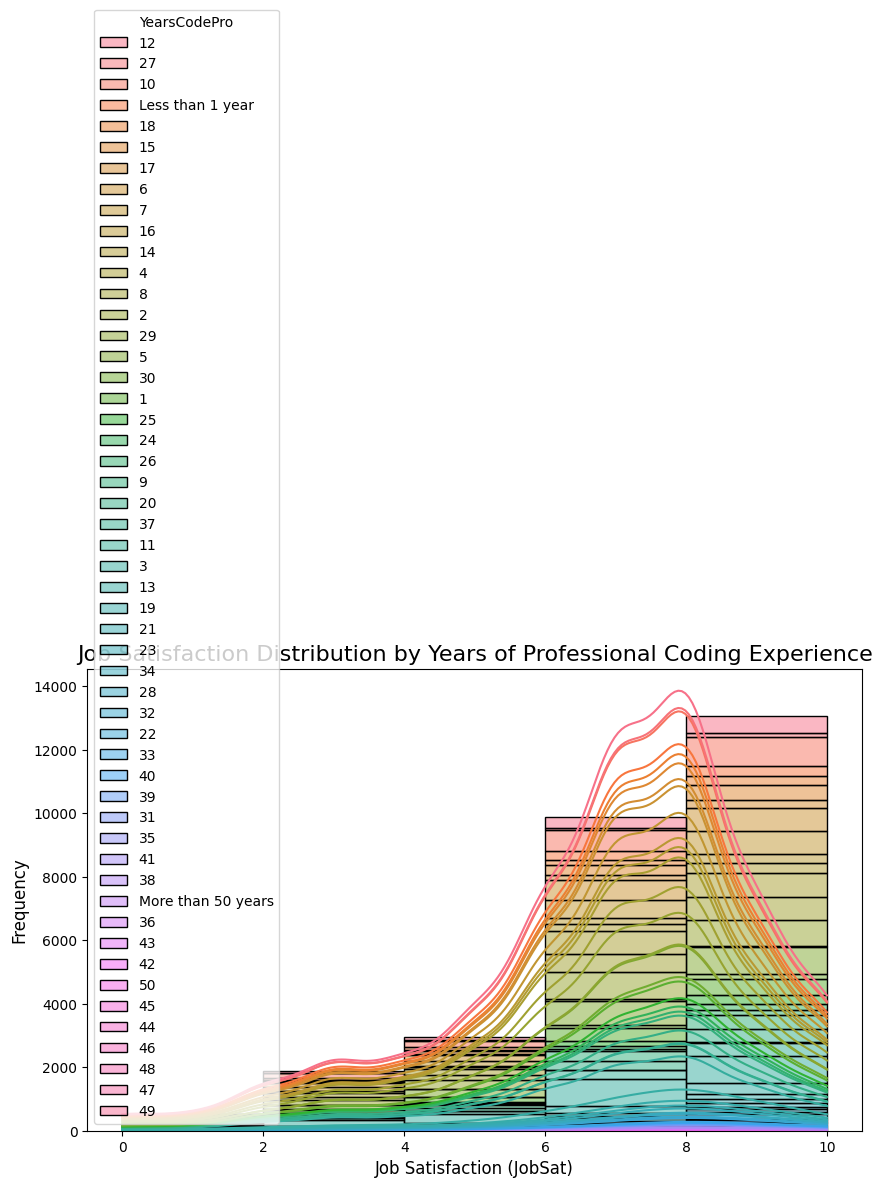

In [23]:
QUERY = "SELECT JobSat, YearsCodePro FROM main"

df = pd.read_sql_query(QUERY, conn)

df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df.dropna(subset=['YearsCodePro', 'JobSat'], inplace=True)

unique_values = df['YearsCodePro'].unique()

def categorize_experience(years):
    if years == 'Less than 1 year':
        return 'Less than 1 year'
    elif years == 'More than 50 years':
        return 'More than 50 years'
    elif years.isdigit():
        years = int(years)
        if years < 1:
            return 'Less than 1 year'
        elif 1 <= years <= 3:
            return '1-3 years'
        elif 4 <= years <= 6:
            return '4-6 years'
        elif 7 <= years <= 10:
            return '7-10 years'
        elif 11 <= years <= 20:
            return '11-20 years'
        elif 21 <= years <= 30:
            return '21-30 years'
        elif years >= 31:
            return '31+ years'
    return 'Other'

df['ExperienceGroup'] = df['YearsCodePro'].apply(categorize_experience)

plt.figure(figsize=(10, 6))

# Using Seaborn's FacetGrid or histplot to create a histogram for each range of YearsCodePro
sns.histplot(data=df, x='JobSat', hue='YearsCodePro', multiple="stack", kde=True, bins=5)

# Add titles and labels
plt.title('Job Satisfaction Distribution by Years of Professional Coding Experience', fontsize=16)
plt.xlabel('Job Satisfaction (JobSat)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
